In [ ]:
#Lectura
import pandas as pd
from google.colab import drive
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/modelosEntregable/diabetesMultivariable.csv'
# lectura de datos en Python
data = pd.read_csv(file_path, header=0, sep=';', engine='python')

#data = pd.read_csv('/usr/diabetesMultivariable.csv', header=0, sep=';',engine='python')



Mounted at /content/drive


In [ ]:
filtered_data = data[(data['EDAD'] < 100) & (data['PESO'] < 150) & (data['IMC'] < 50)]
rows_valid = len(filtered_data)
percentage_valid = (rows_valid / len(data)) * 100
print("Filas válidas: ", rows_valid)
print("Porcentaje de filas válidas: ", percentage_valid, "%")


Filas válidas:  19958
Porcentaje de filas válidas:  99.79 %


Limpieza de datos

In [ ]:
data.isnull().values.any()

True

In [ ]:
data.head()


,TIP_IDE,EDAD,SEXO,PESO,TALLA_ACT,IMC,DIABETES,ARTRITIS,DESNUTRICION
0,CC,79.0,M,46.0,1.50,20.44,0,0,0
1,CC,75.0,M,60.0,1.65,22.04,0,0,0
2,CC,78.0,F,56.0,1.50,24.89,1,0,0
3,CC,20.0,M,47.0,1.68,16.65,0,0,1
4,CC,66.0,M,45.0,1.65,16.53,0,0,1


In [ ]:
data.isna().sum()

TIP_IDE          0
EDAD             6
SEXO            12
PESO             9
TALLA_ACT       15
IMC             13
DIABETES         0
ARTRITIS         0
DESNUTRICION     0
dtype: int64

In [ ]:
data.describe()

,EDAD,PESO,TALLA_ACT,IMC,DIABETES,ARTRITIS,DESNUTRICION
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,49.276600,56.79840,1.624231,21.374512,0.122350,0.013450,0.156700
std,21.473732,14.32945,0.134734,4.650012,0.327698,0.115194,0.363527
min,1.000000,2.00000,0.560000,1.280000,0.000000,0.000000,0.000000
25%,30.000000,48.00000,1.570000,18.290000,0.000000,0.000000,0.000000
50%,50.000000,56.00000,1.650000,20.830000,0.000000,0.000000,0.000000
75%,67.000000,65.00000,1.700000,24.030000,0.000000,0.000000,0.000000
max,99.000000,131.00000,2.500000,61.360000,1.000000,1.000000,1.000000


In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

TIP_IDE         0
EDAD            0
SEXO            0
PESO            0
TALLA_ACT       0
IMC             0
DIABETES        0
ARTRITIS        0
DESNUTRICION    0
dtype: int64

NÚMERO DE MUESTRAS



In [ ]:
num_muestras = data.shape[0]
print("Número de muestras:", num_muestras)

Número de muestras: 19956


DISTRIBUCION DE MUESTRAS POR CLASE

In [ ]:
distribucion_clases = data.groupby(["DIABETES", "ARTRITIS", "DESNUTRICION", "EDAD", "PESO", "TALLA_zACT", "IMC"]).size()
print(distribucion_clases)

DIABETES  ARTRITIS  DESNUTRICION  EDAD  PESO  TALLA_ACT  IMC  
0         0         0             1     8     0.72       15.43    1
                                        10    0.82       14.87    2
                                        11    0.77       18.55    9
                                              2.00       2.75     8
                                  2     11    0.78       18.08    9
                                                                 ..
1         1         0             62    58    1.56       23.83    9
                                  65    67    1.64       24.91    8
                    1             22    52    1.70       17.99    7
                                  63    56    1.55       23.31    2
                                  68    59    1.72       19.94    3
Length: 2666, dtype: int64


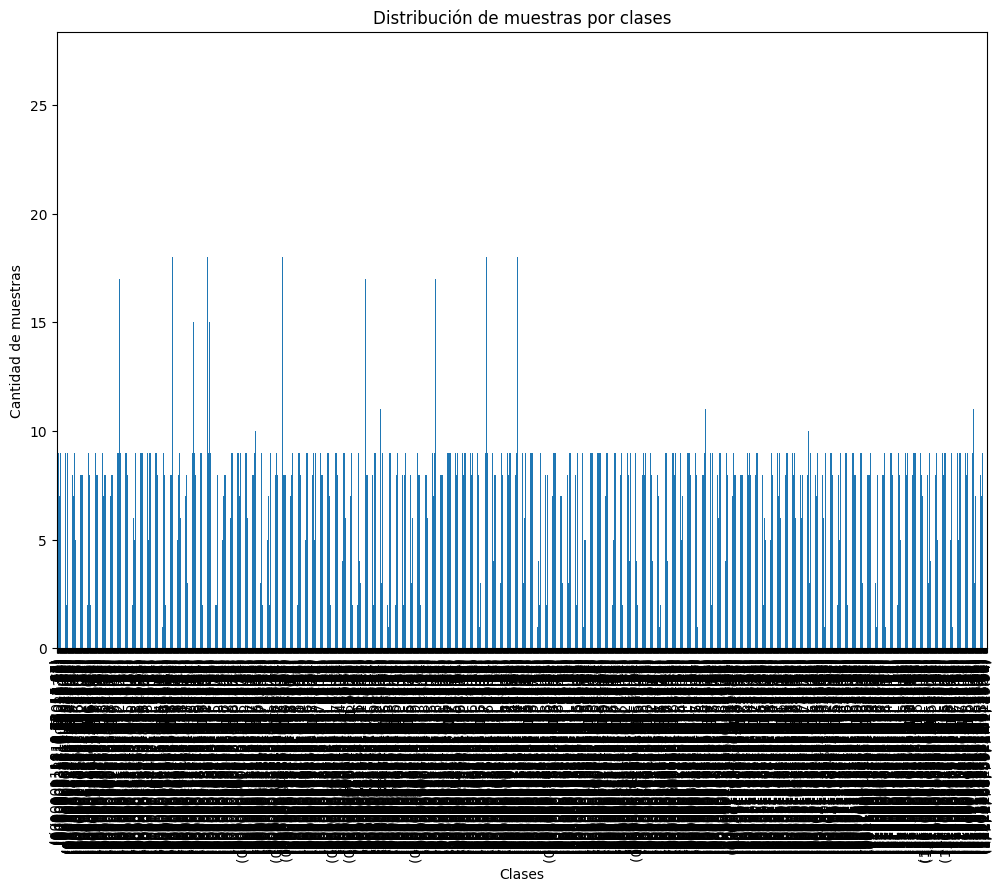

In [ ]:
distribucion_clases.plot(kind='bar', rot=0)
distribucion_clases.plot(kind='bar', figsize=(10, 6))
import matplotlib.pyplot as plt

ax = distribucion_clases.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Clases')
ax.set_ylabel('Cantidad de muestras')
ax.set_title('Distribución de muestras por clases')

plt.show()

DESBALANCEO DE LA BASE DE DATOS

In [ ]:
recuento_clases = data[["DIABETES", "ARTRITIS", "DESNUTRICION", "EDAD", "PESO", "TALLA_ACT", "IMC"]].value_counts()
print(recuento_clases)

DIABETES  ARTRITIS  DESNUTRICION  EDAD  PESO  TALLA_ACT  IMC  
0         0         0             75    60    1.65       22.04    27
                                  56    65    1.65       23.88    20
                                  28    56    1.65       20.57    19
                                  67    55    1.60       21.48    18
                    1             39    55    1.70       19.03    18
                                                                  ..
                    0             69    48    1.53       20.50     1
1         0         0             59    77    1.63       28.98     1
0         0         0             40    60    1.60       23.44     1
                                        67    1.73       22.39     1
                                  1     8     0.72       15.43     1
Length: 2666, dtype: int64


<Axes: xlabel='DIABETES,ARTRITIS,DESNUTRICION,EDAD,PESO,TALLA_ACT,IMC'>

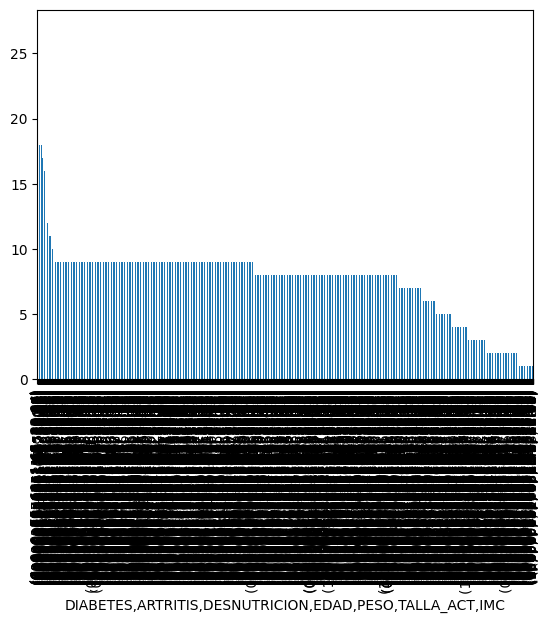

In [ ]:
recuento_clases.plot(kind='bar')

In [5]:
#balancear la db
import pandas as pd
from imblearn.over_sampling import SMOTE
from google.colab import drive

drive.mount('/content/drive')
# lectura de datos en Python


# Lectura de datos en Python
data = pd.read_csv('/content/drive/MyDrive/modelosEntregable/diabetesMultivariable.csv', header=0, sep=';', engine='python')

# Variables de interés
X = data[['EDAD', 'IMC', 'ARTRITIS', 'DESNUTRICION']]
y = data['DIABETES']

# Aplicar SMOTE para balancear los datos
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verificar la nueva distribución de clases
print("Distribución de clases después del balanceo:")
print(y_balanced.value_counts())

# Guardar los datos balanceados en un nuevo archivo CSV
balanced_data = pd.concat([X_balanced, y_balanced], axis=1)
balanced_data.to_csv('/content/drive/MyDrive/modelosEntregable/diabetesMultivariable_balancedEDW.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Distribución de clases después del balanceo:
0    17553
1    17553
Name: DIABETES, dtype: int64
